## Setup and Import Libraries

In [1]:
import os
from typing_extensions import TypedDict
from typing import Annotated
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [4]:
groq_llm = ChatGroq(model="gemma2-9b-it")
openai_llm = ChatOpenAI(model="gpt-4o")

## Implement Simple Chatbot

In [5]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [6]:
memory = MemorySaver()

In [7]:
def superbot(state:State):
    return {"messages":[groq_llm.invoke(state['messages'])]}

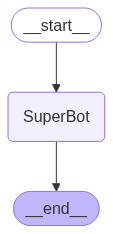

In [8]:
# Build Graph
graph = StateGraph(State)

## Add Nodes
graph.add_node(node="SuperBot", action=superbot)

## Add Edges
graph.add_edge(start_key=START, end_key="SuperBot")
graph.add_edge(start_key="SuperBot", end_key=END)

# Compile Graph
compiled_graph = graph.compile(checkpointer=memory)


## Display Graph
display(Image(compiled_graph.get_graph().draw_mermaid_png()))

In [9]:
config = {"configurable": {"thread_id": "1"}}

compiled_graph.invoke({'messages':"Hi,My name is Saad And I like cricket"}, config=config)

{'messages': [HumanMessage(content='Hi,My name is Saad And I like cricket', additional_kwargs={}, response_metadata={}, id='72e5a64e-9938-4310-9b98-b0b057279a82'),
  AIMessage(content="Hello Saad!\n\nIt's great to meet you.  \n\nCricket is a fantastic sport!  \n\nWhat do you enjoy most about it?  Do you have a favorite team or player? 😊 \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 19, 'total_tokens': 65, 'completion_time': 0.083636364, 'prompt_time': 0.00132678, 'queue_time': 0.254530429, 'total_time': 0.084963144}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--a4ed2399-933a-4858-8b93-e07aae14bfb7-0', usage_metadata={'input_tokens': 19, 'output_tokens': 46, 'total_tokens': 65})]}

## Streaming

Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.

### Streaming with Stream Method

In [10]:
config = {"configurable": {"thread_id": "2"}}

for chunk in compiled_graph.stream(
    input={'messages':"Hi,My name is Saad And I like cricket"}, 
    config=config,
    stream_mode="updates"
):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Hello Saad!\n\nIt's great to meet you. Cricket is a wonderful sport. 🏏 \n\nWhat do you like most about cricket?  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 19, 'total_tokens': 54, 'completion_time': 0.063636364, 'prompt_time': 0.00133652, 'queue_time': 0.246907719, 'total_time': 0.064972884}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--1c684765-fb8f-4bce-8ad1-2eb7f96fdabf-0', usage_metadata={'input_tokens': 19, 'output_tokens': 35, 'total_tokens': 54})]}}


In [11]:
for chunk in compiled_graph.stream(
    input={'messages':"I also like football"}, 
    config=config,
    stream_mode="values"
):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Saad And I like cricket', additional_kwargs={}, response_metadata={}, id='f4aa3873-f5d2-4c33-9a99-1236f550f347'), AIMessage(content="Hello Saad!\n\nIt's great to meet you. Cricket is a wonderful sport. 🏏 \n\nWhat do you like most about cricket?  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 19, 'total_tokens': 54, 'completion_time': 0.063636364, 'prompt_time': 0.00133652, 'queue_time': 0.246907719, 'total_time': 0.064972884}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--1c684765-fb8f-4bce-8ad1-2eb7f96fdabf-0', usage_metadata={'input_tokens': 19, 'output_tokens': 35, 'total_tokens': 54}), HumanMessage(content='I also like football', additional_kwargs={}, response_metadata={}, id='81e733c9-6bdb-4736-89f6-4aa28d4a6017')]}
{'messages': [HumanMessage(content='Hi,My name is Saad 

In [12]:
for chunk in compiled_graph.stream(
    input={'messages':"I also like football"}, 
    config=config,
    stream_mode="updates"
):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="It seems like you have great taste in sports, Saad! \n\nDo you have a favorite team you follow in football? 🏈  I'd love to hear about them! \n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 116, 'total_tokens': 157, 'completion_time': 0.074545455, 'prompt_time': 0.003544138, 'queue_time': 0.255919301, 'total_time': 0.078089593}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--772793a8-03f0-413f-b4c6-ccf9f7bc57f1-0', usage_metadata={'input_tokens': 116, 'output_tokens': 41, 'total_tokens': 157})]}}


In [13]:
for chunk in compiled_graph.stream(
    input={'messages':"I love sports"}, 
    config=config,
    stream_mode="values"
):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Saad And I like cricket', additional_kwargs={}, response_metadata={}, id='f4aa3873-f5d2-4c33-9a99-1236f550f347'), AIMessage(content="Hello Saad!\n\nIt's great to meet you. Cricket is a wonderful sport. 🏏 \n\nWhat do you like most about cricket?  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 19, 'total_tokens': 54, 'completion_time': 0.063636364, 'prompt_time': 0.00133652, 'queue_time': 0.246907719, 'total_time': 0.064972884}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--1c684765-fb8f-4bce-8ad1-2eb7f96fdabf-0', usage_metadata={'input_tokens': 19, 'output_tokens': 35, 'total_tokens': 54}), HumanMessage(content='I also like football', additional_kwargs={}, response_metadata={}, id='81e733c9-6bdb-4736-89f6-4aa28d4a6017'), AIMessage(content="That's awesome, Saad!  Football and c

### Streaming The Responses With astream Method

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Containslanggraph_node, the node emitting the event.

In [14]:
config = {"configurable": {"thread_id": "3"}}

async for event in compiled_graph.astream_events(
    input={"messages":["Hi My name is Saad and I like to play cricket"]}, 
    config=config,
    version="v2"
):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Saad and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'c31e5a77-c2ab-4de5-aacf-da3e9a66c7b8', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi My name is Saad and I like to play cricket', additional_kwargs={}, response_metadata={}, id='15813995-9dee-4558-aeb2-0b86bc4ca4db')]}}, 'name': 'SuperBot', 'tags': ['graph:step:1'], 'run_id': 'dbef6fec-588f-4c16-9d55-e2aaca1dac50', 'metadata': {'thread_id': '3', 'langgraph_step': 1, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:6d13456d-ad4b-69c8-fcec-ceffe5d7db62'}, 'parent_ids': ['c31e5a77-c2ab-4de5-aacf-da3e9a66c7b8']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi My name is Saad and I like to play c